# Project 2: What kind of wine is this?
## SGD route 4/5

In [1]:
import numpy as np
import pandas as pd
from cytoolz import *
from tqdm.auto import tqdm

tqdm.pandas()

---

## Load data

In [2]:
train = pd.read_parquet("s3://ling583/wine-train.parquet", storage_options={"anon": True})
test = pd.read_parquet("s3://ling583/wine-test.parquet", storage_options={"anon": True})

In [3]:
import cloudpickle
from sklearn.metrics import classification_report, f1_score, plot_confusion_matrix

In [4]:
sgd = cloudpickle.load(open("sgd.model", "rb"))

In [6]:
predicted = sgd.predict(test["review_text"])
print(classification_report(test["wine_variant"], predicted))

                    precision    recall  f1-score   support

Cabernet Sauvignon       0.69      0.83      0.75      7558
        Chardonnay       0.82      0.85      0.84      4861
            Merlot       0.82      0.33      0.48      1381
        Pinot Noir       0.77      0.87      0.82      9618
          Riesling       0.80      0.79      0.80      2421
   Sauvignon Blanc       0.84      0.66      0.74      1278
             Syrah       0.75      0.54      0.63      3426
         Zinfandel       0.86      0.51      0.64      2082

          accuracy                           0.76     32625
         macro avg       0.80      0.67      0.71     32625
      weighted avg       0.77      0.76      0.76     32625



---

## LIME
Local Interpretable Model-agnostic Explanations

In [8]:
from lime.lime_text import LimeTextExplainer
import matplotlib.pyplot as plt

In [9]:
explainer = LimeTextExplainer(class_names=sgd.named_steps['sgdclassifier'].classes_)

In [11]:
test["wine_variant"].iloc[1613], test["review_text"].iloc[1613]

('Syrah',
 'Better than I had expected although very, very tight you could see glimpses of very nice wine down the road')

In [15]:
exp = explainer.explain_instance(
    test["review_text"].loc[1613], sgd.decision_function, num_features=15, labels=[0, 1, 2, 3, 4, 5, 6, 7]
)

[]

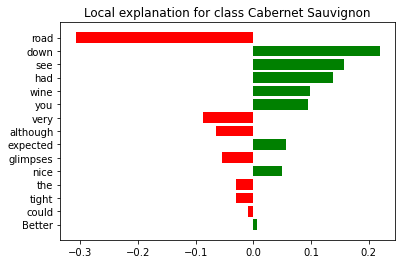

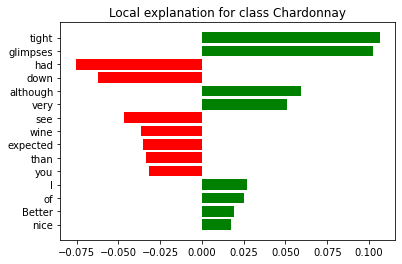

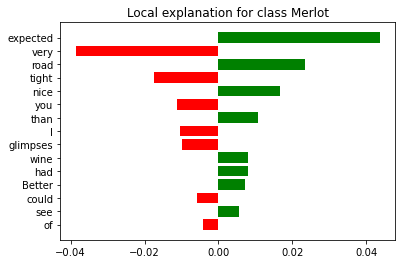

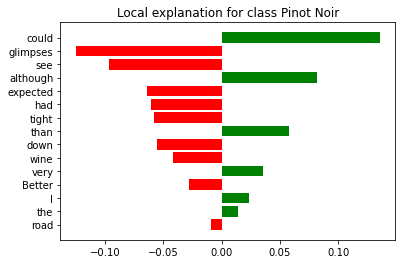

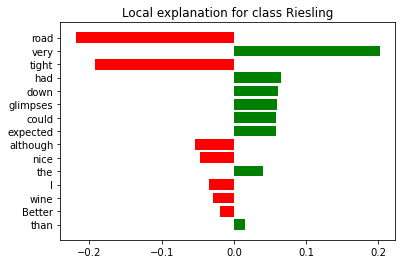

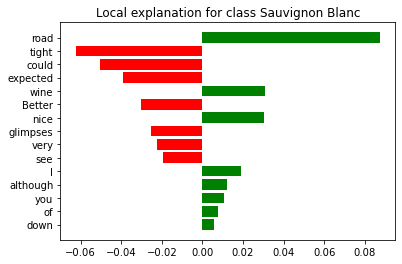

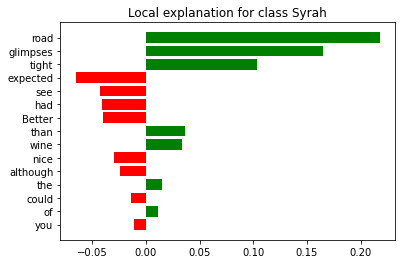

In [17]:
for i in range(0, 7):
    exp.as_pyplot_figure(i)
plt.plot()

In [18]:
err = test[(test['wine_variant']=='Merlot')&(predicted=='Cabernet Sauvignon')]

In [19]:
len(err)

582

In [20]:
err.iloc[30]

review_text     Good QPR. Nose of cherry, milk chocolate and h...
wine_variant                                               Merlot
Name: 2025, dtype: object

In [22]:
err.iloc[30]['review_text']

'Good QPR. Nose of cherry, milk chocolate and hints of dirt. Medium body with decent tannins. Balanced but not complex- yet enjoyable.'

[]

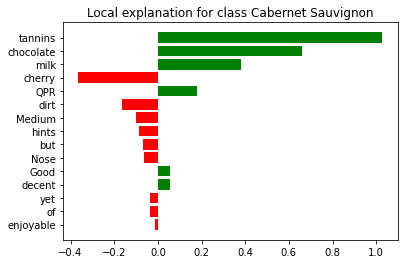

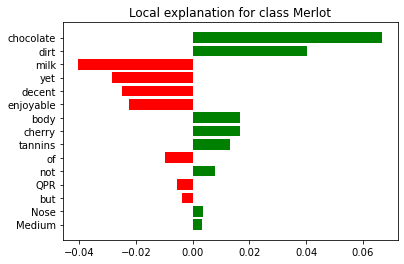

In [25]:
exp = explainer.explain_instance(
    err["review_text"].iloc[30], sgd.decision_function, num_features=15, labels=[0, 2]
)
for i in [0, 2]:
    exp.as_pyplot_figure(i)
plt.plot()

In [26]:
err.iloc[50]

review_text     Definately more oxidized/aged than last time -...
wine_variant                                               Merlot
Name: 3419, dtype: object

In [27]:
err.iloc[50]['review_text']

'Definately more oxidized/aged than last time - but the strange thing was it was also more tannic than I remember. Drink now with a good steak.'

[]

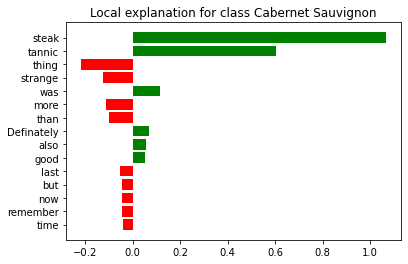

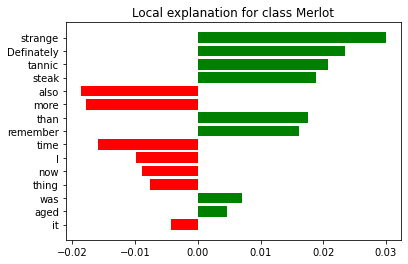

In [28]:
exp = explainer.explain_instance(
    err["review_text"].iloc[50], sgd.decision_function, num_features=15, labels=[0, 2]
)
for i in [0, 2]:
    exp.as_pyplot_figure(i)
plt.plot()

In [29]:
import kwic

In [30]:
kwic.kwic('road', train['review_text'])

589,Not very impressed with this Wine. Its a nice middle of the,road,"Merlot, but lacks fruit. Boring is the word."
668,"my notes are the same as for the last bottle, however, 6months down the",road,", the wine is not quite as intense as before. unfortunately, there is no mo"
700,t as bright and tart as the Acapella. This is more or less a middle of the,road,SQN pinot. Very enjoyable but not worth the secondary market premium.
1661,wine up at the Kendall-Jackson tasting room in Healdsburg over winter wine,road,. It's inky purple and full bodied but needs to breath for a while to open
2103,"up now, as it doesn't seem to have much more stuffing to take it down the",road,. DECANT: 2 hr GLASS USED: Bordeaux TASTE: 9.2 OTHER: COST: 55 VALUE: 8.5
2270,he best young cali cabs I've ever had. Will get much more complex down the,road,. Big upside.
2829,"pberry, Black Pepper on the palate. Not complex or simple....middle of the",road,". Quick fading, light tannins, medium short finish. Overall a good value. D"
5606,ose - perfumed and interesting nose that evolved with time. initial stinky,road,"tar aromas evolving into a musky raspberry nose mouth - minerally, lean, a"
6032,"rushed black/blueberries, roasted espresso bean, Kirsch liqueur, sweet hot",road,"tar. In the mouth....classic SAXUM! Rich dark oozing berry fruit, not too"
6202,"infandel, 5% Cabernet Sauvignon. From the Fratelli vineyard on Watsonville",Road,.


In [32]:
kwic.kwic('strange', train['review_text'])

122,arth and peat with only hints of mountian fruit. Tastes almost lik scotch?,Strange,wine.
407,th air. Smoke & more smoke over lemon citrus flavors & charred toast. Very,strange,at this point. Tasted double blind.
461,Very,strange,", I liked this wine in Lodi the first time, but it tasted like a Zinfandeli"
496,Very,strange,", seemed to have tiny bubbles on opening which sat at the edge of the rim,"
1260,"iar, raspberries, funky, and a little harsh. Big harsh acid on the palate,",strange,", and off balanced. Similar nature on the finish, and makes me cringe a bit"
1307,ny superior tasting wines at this price point. The cork appeared to have a,strange,"blueish-green substance in some cracks, which may have been mold. This lik"
1523,"Good, no not good, oh yes good, maybe not..... well. What a",strange,"night with this. Ultimately, wins out as pretty good -- actually damn good"
1550,"g fruit on the palate, which is very large, and doesn't feel all together.",Strange,"texture. The finish is mildly grippy, but off balanced fruit texture. Odd"
1757,"Very light nose, some rope aromas, and chestnut shells. Some",strange,off balance nature on the palate... it just seemed to be shooting in all s
1757,"just seemed to be shooting in all sorts of various directions for me, with",strange,"texture, and not much integrated... weird. Better into the finish, with ni"


In [33]:
kwic.kwic('tannic', train['review_text'])

110,ce and fruit with hints of tar. On the palate the fruit was massive - good,tannic,"structure, with blueberry and blackberry, roasted strawberries, and char/t"
121,"r quality fruity aroma with hints of secondary rich, full body, still very",tannic,", balanced acidity, good harmony, very young, can further age 3-5 years til"
185,"Street at Christmas, on the palate, bright and lively, the merest hint of",tannic,"grip at the end - superb - by a whisker, my favourite of the evening"
210,"ark fruit. The palate was dense with earth, spice and dark fruit. A little",tannic,and a long finish. This is still very young and clearly has a long way to
242,"blackberry jam, prune, and fruit leathers. Hint of green pepper. Slightly",tannic,", moderate volume in the mouth, with flavors of berry; quite jammy. Finishe"
283,per with a nice dusty element. Considerable elegance but backed by a great,tannic,structure that will make this wine evolve for 2 decades. Nice long finish.
295,"ts, spice, olive, earth. Similar on the palate with a great earthiness and",tannic,background. This was a really terrific bottle of wine. I will likely wait
318,Still,tannic,"and needs a bit of rest to pop & pour, but super potential. With 30 minute"
325,"exotic wood spice, mocha powder, blackberry, kirsch, currant. Very tight,",tannic,"in the mouth. Also started with a tiny bit of sour plum. But, as the wine"
417,"with pale meniscus; mature, earthy, tart cherry, brett nose; brett, tart,",tannic,"red fruit, mineral palate; medium-plus finish 86+ points"
